## Assignment 2

Using the corpus of Fake vs Real news, write some code which does the following:

-Split the data into two datasets - one of Fake news and one of Real news

For every headline:

-Get the sentiment scores

-Find all mentions of geopolitical entites

-Save a CSV which shows the text ID, the sentiment scores, and column showing all GPEs in that text

-Find the 20 most common geopolitical entities mentioned across each dataset - plot the results as a bar charts

In [1]:
#Install the following: it is in setup.sh folder
#tqdm
#spaCy
#python -m spacy download en_core_web_sm

# terminal + : pip install spacytextblob (not in setup)

In [2]:
# Data analysis
import os
import pandas as pd
from tqdm import tqdm #quick overview of time (progress bar)

# NLP
import spacy
nlp = spacy.load("en_core_web_sm") #English model

# sentiment analysis VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() #using VADER for the analysis

# visualisations
import matplotlib.pyplot as plt #simple visulizations

2022-05-19 18:55:10.160952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 18:55:10.160984: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Load the data:
# get the filepath
filepath = os.path.join("..","..","CDS-LANG","tabular_examples","fake_or_real_news.csv")

In [4]:
# load the data
#open csv with pandas
data = pd.read_csv(filepath)

In [5]:
#looking at the dataset
print(data)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [ ]:
#Starting with the whole dataset and splitting into real and fake news later

In [6]:
#Getting textID
#https://stackoverflow.com/questions/26098710/rename-unnamed-column-pandas-dataframe
#Rename column 0 (the unnamed column) textID.
data.rename(columns={'Unnamed: 0':'textID'}, inplace=True)
print(data)

      textID                                              title  \
0       8476                       You Can Smell Hillary’s Fear   
1      10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2       3608        Kerry to go to Paris in gesture of sympathy   
3      10142  Bernie supporters on Twitter erupt in anger ag...   
4        875   The Battle of New York: Why This Primary Matters   
...      ...                                                ...   
6330    4490  State Department says it can't find emails fro...   
6331    8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332    8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333    4021  In Ethiopia, Obama seeks progress on peace, se...   
6334    4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  

In [7]:
#Getting sentiment score for a single text in the dataset
text_example = data["title"] [3] #Getting the 4th file in the dataset
text_example

"Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'"

In [8]:
analyzer.polarity_scores(text_example)
#slightly negative

{'neg': 0.266, 'neu': 0.591, 'pos': 0.143, 'compound': -0.3595}

In [9]:
#Making a list of all sentiment scores for every headline (aka the title column) in the dataset
def sent_score(dataframe_column):
    output_list =[] #empty list for inputting the sentiment score
    for title in dataframe_column: #For every single title in the "title" column in the pandas dataframe
        score = analyzer.polarity_scores(title) #score using VADER
        output_list.append(score) #appending to the list
    return output_list

In [10]:
sentiment_score = sent_score(data["title"])

In [11]:
#Getting the sentiment score for every headline in the dataset into a dataframe

sentiment_df = pd.DataFrame(sentiment_score, columns= ["neg", "neu", "pos", "compound"]) #columns
sentiment_df

,neg,neu,pos,compound
0,0.444,0.556,0.000,-0.4939
1,0.242,0.645,0.113,-0.5267
2,0.000,0.762,0.238,0.3612
3,0.266,0.591,0.143,-0.3595
4,0.243,0.654,0.103,-0.3612
...,...,...,...,...
6330,0.000,1.000,0.000,0.0000
6331,0.000,1.000,0.000,0.0000
6332,0.192,0.808,0.000,-0.2263
6333,0.000,0.479,0.521,0.8271


In [12]:
#combining the two dataframes: 'data' dataframe and 'sentiment_df' dataframe
sentimentedDF = pd.concat([data, sentiment_df], axis=1, join='inner')
sentimentedDF

,textID,title,text,label,neg,neu,pos,compound
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.444,0.556,0.000,-0.4939
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.242,0.645,0.113,-0.5267
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.000,0.762,0.238,0.3612
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.266,0.591,0.143,-0.3595
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.243,0.654,0.103,-0.3612
...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0.000,1.000,0.000,0.0000
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0.000,1.000,0.000,0.0000
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0.192,0.808,0.000,-0.2263
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271


In [13]:
#Finding mentions of geopolitical entites (GPEs) in headlines (aka title column)
#two empty lists
ents = []
headline_title = []

for headline in tqdm(nlp.pipe(data["title"], batch_size=500)): #tqdm = progress bar
    for entity in headline.ents:
        #only keep entities if they are a GPE
        if entity.label_ == "GPE":
            headline_title.append(headline.text) #headline text into headline_title list
            ents.append(entity.text) #GPE into the ents list
        else:
            continue

6335it [00:09, 645.04it/s]


In [14]:
print(len(ents)) #Checking if the two lists are the same length
print(len(headline_title))

1679
1679


In [15]:
# getting the two lists in a combined dataframe
GPE_test = pd.DataFrame({"title": headline_title, "GPE Found": ents})
GPE_test.head(20) #Getting the first 20 entries in the dataset (there are many)

,title,GPE Found
0,Kerry to go to Paris in gesture of sympathy,Paris
1,"Tehran, USA",Tehran
2,"Tehran, USA",USA
3,‘Britain’s Schindler’ Dies at 106,Britain
4,Iran reportedly makes new push for uranium con...,Iran
5,"With all three Clintons in Iowa, a glimpse at ...",Iowa
6,What's in that Iran bill that Obama doesn't like?,Iran
7,The 1 chart that explains everything you need ...,America
8,Sanders Trounces Clinton in W. Va. -- But Will...,W. Va.
9,Brexit Encourages UK to Trade With Non-EU Stat...,UK


In [16]:
#combining the previously combined dataframe (the one with sentiments) and the new dataframe (the one with GPEs)
mergedDF = pd.merge(sentimentedDF, GPE_test, on="title", how = "outer") 
#you apprently need an outer-join in order to get the texts where no GPEs are found (NaN = Not a number)
#inner-joining will result in getting only entries where a GPE has been found in the title
mergedDF

,textID,title,text,label,neg,neu,pos,compound,GPE Found
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.444,0.556,0.000,-0.4939,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.242,0.645,0.113,-0.5267,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.000,0.762,0.238,0.3612,Paris
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.266,0.591,0.143,-0.3595,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.243,0.654,0.103,-0.3612,NaN
...,...,...,...,...,...,...,...,...,...
6662,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0.000,1.000,0.000,0.0000,NaN
6663,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0.192,0.808,0.000,-0.2263,NaN
6664,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,Ethiopia
6665,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,East Africa


In [17]:
#Now splitting the dataset: splitting into real news
real_news = mergedDF[mergedDF['label'] == "REAL"]
real_news

,textID,title,text,label,neg,neu,pos,compound,GPE Found
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.000,0.762,0.238,0.3612,Paris
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.243,0.654,0.103,-0.3612,NaN
8,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,0.000,1.000,0.000,0.0000,Britain
9,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,0.000,1.000,0.000,0.0000,NaN
10,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,0.000,1.000,0.000,0.0000,Iran
...,...,...,...,...,...,...,...,...,...
6659,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,0.253,0.455,0.292,-0.1027,NaN
6661,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0.000,1.000,0.000,0.0000,NaN
6664,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,Ethiopia
6665,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,East Africa


In [18]:
#Counting the GPE's in the real_news dataset
real_news.value_counts("GPE Found")

GPE Found
Iran                  86
US                    62
America               48
Iowa                  43
U.S.                  43
                      ..
Giving                 1
New Responses          1
New Mexico             1
New Hampshire’s        1
the United States'     1
Length: 195, dtype: int64

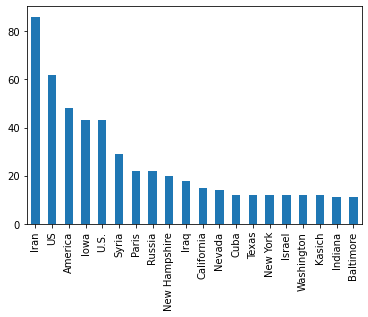

In [19]:
#Plotting the 20 most frequently mentioned GPE in the real news dataframe as a Bar Chart
AxesSubplot = real_news['GPE Found'].value_counts().nlargest(20).plot.bar()

In [20]:
#save the 20 most frequently mentioned GPE in the real news subset in output folder
AxesSubplot.get_figure().savefig(os.path.join("output/real_bar_chart.png"))

In [22]:
#doing the same with the fake news category
#Splitting the data into fake_news
fake_news = mergedDF[mergedDF['label'] == "FAKE"] 
(fake_news)

,textID,title,text,label,neg,neu,pos,compound,GPE Found
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.444,0.556,0.000,-0.4939,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.242,0.645,0.113,-0.5267,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.266,0.591,0.143,-0.3595,NaN
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,0.000,1.000,0.000,0.0000,Tehran
6,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,0.000,1.000,0.000,0.0000,USA
...,...,...,...,...,...,...,...,...,...
6657,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE,0.125,0.875,0.000,-0.2500,NaN
6658,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,0.465,0.535,0.000,-0.7804,NaN
6660,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,0.118,0.882,0.000,-0.1531,Brazil
6662,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0.000,1.000,0.000,0.0000,NaN


In [23]:
#Counting the GPEs in the fake_news dataset
fake_news.value_counts("GPE Found")

GPE Found
US                              101
Russia                          100
America                          41
Syria                            37
U.S.                             31
                               ... 
Libya                             1
Lifetime                          1
Liver                             1
Lynch                             1
the United States of America      1
Length: 217, dtype: int64

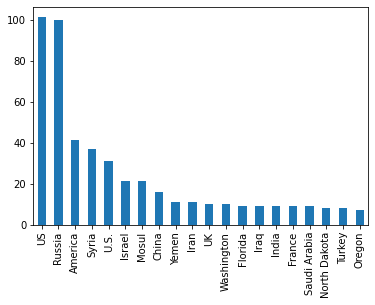

In [24]:
#Plotting the 20 most frequently mentioned GPE in the fake news dataframe as a Bar Chart
AxesSubplot_2 = fake_news['GPE Found'].value_counts().nlargest(20).plot.bar()

In [25]:
#save the 20 most frequently mentioned GPE in the fake news subset in output folder
AxesSubplot_2.get_figure().savefig(os.path.join("output/fake_bar_chart.png"))

In [26]:
#saving the dframe in specific folder
mergedDF.to_csv(os.path.join("..","..","cds-lang", "Lang-assignments", "output", "df_assign_2.csv"))

print("Done! dframe has been generated and saved in the output folder as assign_2.csv")

Done! dframe has been generated and saved in the output folder as assign_2.csv
